In [100]:
import pandas as pd
import altair as alt

potential_snl = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/full_data_snl_movies_coefficient.csv")
definitive_snl = potential_snl[potential_snl['movie_coefficient']>1]

In [101]:
potential_snl.shape

(4494, 15)

In [102]:
with open("/Users/estene/Documents/GitHub/snl_coefficient/data/snl_associated_media.txt", "r") as tf:
    snl_media = tf.read().split('\n')
definitive_snl = definitive_snl[~definitive_snl['imdb_link'].isin(snl_media)] # this removes the "SNL-associated" media
definitive_snl.shape

(185, 15)

In [103]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [104]:
# Bar Chart of Definitive SNL Media Genres (that aren't directly associated with SNL)
genres_count = definitive_snl.copy()
genres_count['genres'] = genres_count['genres'].apply(eval)
for idx, row in genres_count.iterrows():
    genres_count.at[idx, 'genres'] = "|".join(map(str,row.genres))

genres_count.head()
genres_count.to_csv("genres.csv", index=False)
genres_unique = tidy_split(genres_count, "genres", sep='|', keep=False)
genres_unique =  genres_unique.groupby(['genres']).size().reset_index(name="count")
genres_unique.sort_values(by='count', ascending=False, inplace=True)
genres_unique

bars = alt.Chart(genres_unique).mark_bar().encode(x='count',y=alt.Y('genres',sort='-x'))
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [105]:
definitive_snl_genres = (bars + text).properties(height=900)
definitive_snl_genres.save('definitive_snl_genres_bar_chart.html')

In [106]:
# Bar Chart of Definitive SNL Media Types (that aren't directly associated with SNL)
media_count = definitive_snl.copy()
media_count['medium'] = media_count['medium'].astype(str)
#media_count['medium'] = media_count['medium'].apply(eval)
print(media_count['medium'].values)
for idx, row in media_count.iterrows():
    media_count.at[idx, 'medium'] = "|".join(map(str,row.medium))

media_count.head()
media_unique = tidy_split(media_count, "medium", sep='|', keep=False)
media_unique = media_unique.groupby(['medium']).size().reset_index(name="count")
media_unique.sort_values(by='count', ascending=False, inplace=True)
media_unique

bars = alt.Chart(media_unique).mark_bar().encode(x='count',y=alt.Y('medium',sort='-x'))
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

["['TV Special']" "['TV Special']" "['TV Special']" "['TV Special']"
 "['TV Movie']" "['TV Special']" "['TV Movie']" "['TV Special']"
 "['Podcast Series']" "['TV Series']" "['Film']" "['TV Special']"
 "['Film']" "['Film']" "['TV Series']" "['TV Movie']" "['Film']"
 "['TV Movie']" "['TV Movie']" "['TV Special']" "['TV Movie']" "['Film']"
 "['Video']" "['TV Special']" "['TV Special']" "['TV Special']"
 "['TV Special']" "['TV Special']" "['TV Series']" "['TV Special']"
 "['TV Special']" "['TV Special']" "['TV Special']" "['Film']"
 "['TV Series']" "['TV Series']" "['TV Special']" "['Video']"
 "['TV Special']" "['TV Special']" "['TV Special']" "['TV Special']"
 "['TV Special']" "['Film']" "['Film']" "['TV Movie']" "['TV Special']"
 "['Film']" "['TV Movie']" "['TV Special']" "['TV Special']"
 "['TV Special']" "['TV Special']" "['Film']" "['Film']" "['TV Special']"
 "['Film']" "['Film']" "['Film']" "['TV Mini Series']" "['Film']"
 "['TV Special']" "['TV Movie']" "['TV Special']" "['Film']"
 

alt.LayerChart(...)

In [107]:
# Bar Chart of Alums Involved in SNL Media (that aren't directly associated with SNL)
alums_count = definitive_snl.copy()
alums_count['snl_alums'] = alums_count['snl_alums'].apply(eval)
for idx, row in alums_count.iterrows():
    alums_count.at[idx, 'snl_alums'] = "|".join(map(str,row.snl_alums))
#alums_count.head()
alums_unique = tidy_split(alums_count, "snl_alums", sep='|', keep=False)
#alums_unique.head()
alums_unique = alums_unique.groupby(['snl_alums']).size().reset_index(name="count")
alums_unique.sort_values(by='count', ascending=False, inplace=True)
alums_unique = alums_unique[alums_unique['count']>20]
alums_unique

bars = alt.Chart(alums_unique).mark_bar().encode(x='count',y=alt.Y('snl_alums',sort='-x'))
text = bars.mark_text(
    align='left',
   baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [108]:
snl_media_alums_not_definitive = (bars + text).properties(height=900)
snl_media_alums_not_definitive.save('most_common_snl_alums_in_non_definitive_snl_media.html')

In [109]:
# Bar Chart of Definitive SNL Films (that aren't directly associated with SNL) by Decade
films_by_decade = definitive_snl.copy()
films_by_decade['medium'] = films_by_decade['medium'].apply(eval)
for idx, row in films_by_decade.iterrows():
    films_by_decade.at[idx, 'medium'] = "|".join(map(str,row.medium))
    
films_by_decade = films_by_decade[films_by_decade['medium']=='Film']
films_by_decade['year_start'] = films_by_decade['year_start'].astype('string')
for idx, row in films_by_decade.iterrows():
    films_by_decade.at[idx, 'decade'] = row.year_start[:3] + '0s'
films_by_decade.head()

films_by_decade_unique = films_by_decade.groupby(['decade']).size().reset_index(name="count")

bars = alt.Chart(films_by_decade_unique).mark_bar().encode(x='decade',y='count')
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=0  # Nudges text to right so it doesn't appear on top of the bar - need to fix for this one. also tooltip?
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [110]:
# Create a stacked bar chart
alt.Chart(films_by_decade_unique).mark_bar(size=4).encode(
    
    # Year on the X axis
    x=alt.X('decade:N', axis=alt.Axis(format='c', title='Decade')),
    
    # Number of objects on the Y axis
    y=alt.Y('count:Q', title='Number of media properties'),
    
    # Color according to the type
    #color='medium:N',
    
    # Details on hover
    tooltip=[alt.Tooltip('decade:N', title='Decade'), alt.Tooltip('count:Q', title='Count', format=',')]
).properties(width=700)

alt.Chart(...)

In [111]:
# Bar Chart of Definitive SNL Media (that aren't directly associated with SNL) by Decade & Genre
media_by_decade = definitive_snl.copy()
media_by_decade['year_start'] = media_by_decade['year_start'].astype('string')
media_by_decade = media_by_decade.dropna(subset=['year_start'])
for idx, row in media_by_decade.iterrows():
    media_by_decade.at[idx, 'decade'] = row.year_start[:3] + '0s'
media_by_decade.head()

media_by_decade['medium'] = media_by_decade['medium'].apply(eval)
for idx, row in media_by_decade.iterrows():
    media_by_decade.at[idx, 'medium'] = "|".join(map(str,row.medium))

media_by_decade.head()

media_by_decade_unique = media_by_decade.groupby(['decade','medium']).size().reset_index(name="count")


# Create a stacked bar chart
alt.Chart(media_by_decade_unique).mark_bar(size=4).encode(
    
    # Year on the X axis
    x=alt.X('decade:N', axis=alt.Axis(format='c', title='Decade')),
    
    # Number of objects on the Y axis
    y=alt.Y('count:Q', title='Number of objects'),
    
    # Color according to the type
    color='medium:N',
    
    # Details on hover
    tooltip=[alt.Tooltip('medium:N', title='Medium'), alt.Tooltip('decade:N', title='Decade'), alt.Tooltip('count:Q', title='Count', format=',')]
).properties(width=700)


#media_by_decade_unique

alt.Chart(...)

In [112]:
# build a dataset of potential SNL movies where Lorne is an snl_alum OR broadway video is involved AND the coefficient is below 1
not_definitive = potential_snl[potential_snl['movie_coefficient']<1]
lorne_factor = not_definitive[not_definitive['snl_alums'].str.contains("Lorne Michaels")]
lorne_factor.shape

(45, 15)

In [113]:
broadway_factor = not_definitive.dropna(subset=['production_companies'])
broadway_factor = broadway_factor[broadway_factor['production_companies'].str.contains("Broadway Video")]
broadway_factor.shape

(21, 15)

In [114]:
# What other actors do a MAJORITY of their eligible filmography above the SNL coefficient?
all_potential_snl = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/full_data_snl_movies_coefficient.csv")
list_pot_snl = all_potential_snl['imdb_link'].to_list()
all_definitive_snl = potential_snl[potential_snl['movie_coefficient']>1]

with open("/Users/estene/Documents/GitHub/snl_coefficient/data/snl_associated_media.txt", "r") as tf:
    snl_media = tf.read().split('\n')
we_call_snl_movies = all_definitive_snl[~all_definitive_snl['imdb_link'].isin(snl_media)]
list_we_call_snl = we_call_snl_movies['imdb_link'].to_list()
list_def_snl = all_definitive_snl['imdb_link'].to_list()
filmography_credits = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/performers_filmography_cleaned.csv")
with open("/Users/estene/Documents/GitHub/snl_coefficient/data/snl_alums.txt", "r") as tf:
    snl_alums = tf.read().split('\n')
del snl_alums[0]
columns = ['person', 'num_credits', 'potential_percent', 'def_percent','snl_percent']
filmography_percentage = pd.DataFrame(columns = columns)
for alum in snl_alums:
    all_credits = filmography_credits[filmography_credits['person']==alum].reset_index()
    all_credits = list(set(all_credits['imdb_link'].to_list()))
    num_credits = len(all_credits)
    they_are_df = [x for x in list_def_snl if x in all_credits]
    if len(they_are_df)!=0:
        def_percent = len(they_are_df)/len(all_credits)
    else:
        def_percent = 0
    they_are_pot = [x for x in list_pot_snl if x in all_credits]
    if len(they_are_pot)!=0:
        pot_percent = len(they_are_pot)/len(all_credits)
    else:
        pot_percent = 0
    they_are_we = [x for x in list_we_call_snl if x in all_credits]
    if len(they_are_we)!=0:
        snl_percent = len(they_are_we)/len(all_credits)
    else:
        snl_percent = 0
    values = [[alum, num_credits, pot_percent, def_percent, snl_percent]] 
    print(values)
    #filmography_percentage.iloc[count] = values
    filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
performers_coefficient = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/performers_with_coefficient.csv")
alums_snl_info = pd.merge(filmography_percentage, performers_coefficient, on='person', how='outer')
alums_snl_info.to_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/perfomers_snl_credits_percentage.csv", index=False)
alums_snl_info
#For an actor's entire filmography (# of IMDB links in their filmography with coefficients above 1)/(# of IMDB links in their filmography)
#For an actor's potential SNL filmography (# of IMDB links in their filmography with coefficients above 1)/(# of IMDB links that could potentially be SNL films)

# What actors do a MAJORITY of their eligible filmography under the SNL coefficient?

[['Seth Meyers', 237, 0.8565400843881856, 0.28270042194092826, 0.1308016877637131]]
[['Colin Jost', 82, 0.926829268292683, 0.23170731707317074, 0.13414634146341464]]
[['Michael Che', 82, 0.9024390243902439, 0.17073170731707318, 0.0975609756097561]]
[['Tina Fey', 319, 0.8871473354231975, 0.2884012539184953, 0.15673981191222572]]
[['Dennis Miller', 187, 0.7165775401069518, 0.1443850267379679, 0.026737967914438502]]
[['Jimmy Fallon', 398, 0.7437185929648241, 0.19597989949748743, 0.0829145728643216]]
[['Amy Poehler', 349, 0.8538681948424068, 0.24068767908309455, 0.12320916905444126]]
[['Jane Curtin', 158, 0.7341772151898734, 0.25949367088607594, 0.05063291139240506]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Norm MacDonald', 166, 0.8132530120481928, 0.22289156626506024, 0.060240963855421686]]
[['Kevin Nealon', 322, 0.7546583850931677, 0.15527950310559005, 0.034161490683229816]]
[['Colin Quinn', 158, 0.7721518987341772, 0.14556962025316456, 0.056962025316455694]]
[['Bill Murray', 339, 0.6135693215339233, 0.15339233038348082, 0.058997050147492625]]
[['Chevy Chase', 328, 0.6920731707317073, 0.15853658536585366, 0.057926829268292686]]
[['Brad Hall', 36, 0.7222222222222222, 0.08333333333333333, 0]]
[['Cecily Strong', 78, 0.8974358974358975, 0.32051282051282054, 0.14102564102564102]]
[['Dan Aykroyd', 407, 0.7125307125307125, 0.16461916461916462, 0.05896805896805897]]
[['Brian Doyle-Murray', 186, 0.6344086021505376, 0.06451612903225806, 0.021505376344086023]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Charles Rocket', 92, 0.4673913043478261, 0.043478260869565216, 0]]
[['Christopher Guest', 171, 0.8713450292397661, 0.0935672514619883, 0.011695906432748537]]
[['Mary Gross', 87, 0.6781609195402298, 0.08045977011494253, 0]]
[['Christine Ebersole', 131, 0.549618320610687, 0.030534351145038167, 0.007633587786259542]]
[['Gail Matthius', 51, 0.49019607843137253, 0.058823529411764705, 0]]
[['Billy Crystal', 427, 0.6885245901639344, 0.0585480093676815, 0.02576112412177986]]
[['Horatio Sanz', 182, 0.7967032967032966, 0.22527472527472528, 0.027472527472527472]]
[['Joe Piscopo', 143, 0.5314685314685315, 0.11188811188811189, 0.006993006993006993]]
[['Garrett Morris', 183, 0.5956284153005464, 0.18032786885245902, 0.01092896174863388]]
[['Fred Wolf', 37, 0.8918918918918919, 0.2972972972972973, 0.1891891891891892]]
[['James Downey (I)', 46, 0.9347826086956522, 0.717391304347826, 0.10869565217391304]]
[['Tom Davis (I)', 50, 0.88, 0.64, 0.16]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Al Franken', 192, 0.765625, 0.19270833333333334, 0.0625]]
[['Tom Schiller', 36, 0.75, 0.4166666666666667, 0.05555555555555555]]
[['A. Whitney Brown', 32, 0.84375, 0.40625, 0.0625]]
[["Michael O'Donoghue", 38, 0.8947368421052632, 0.6052631578947368, 0.07894736842105263]]
[['Mikey Day', 33, 0.9090909090909091, 0.3939393939393939, 0.15151515151515152]]
[['Phil Hartman', 176, 0.75, 0.2897727272727273, 0.022727272727272728]]
[['Jim Belushi', 276, 0.5434782608695652, 0.03985507246376811, 0.007246376811594203]]
[['Andrew Dismukes', 5, 0.8, 0.2, 0]]
[['Robin Duke', 68, 0.6176470588235294, 0.11764705882352941, 0.029411764705882353]]
[['Leslie Jones', 88, 0.8409090909090909, 0.13636363636363635, 0.07954545454545454]]
[['Peter Aykroyd', 21, 0.8095238095238095, 0.14285714285714285, 0.047619047619047616]]
[['John Belushi', 119, 0.8823529411764706, 0.35294117647058826, 0.06722689075630252]]
[['Rich Hall', 138, 0.42028985507246375, 0.043478260869565216, 0.014492753623188406]]
[['Fred Armisen', 334

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Morwenna Banks', 121, 0.15702479338842976, 0.01652892561983471, 0]]
[['Vanessa Bayer', 93, 0.9032258064516129, 0.23655913978494625, 0.07526881720430108]]
[['Beck Bennett', 78, 0.8333333333333334, 0.1794871794871795, 0.05128205128205128]]
[['Jim Breuer', 111, 0.6666666666666666, 0.16216216216216217, 0.02702702702702703]]
[['Paul Brittain', 18, 0.8333333333333334, 0.3333333333333333, 0.16666666666666666]]
[['Aidy Bryant', 88, 0.9431818181818182, 0.29545454545454547, 0.11363636363636363]]
[['Beth Cahill', 17, 0.8823529411764706, 0.35294117647058826, 0]]
[['Dana Carvey', 196, 0.8928571428571429, 0.3112244897959184, 0.08163265306122448]]
[['Ellen Cleghorne', 70, 0.7428571428571429, 0.24285714285714285, 0.04285714285714286]]
[['George Coe', 137, 0.44525547445255476, 0.014598540145985401, 0]]
[['Joan Cusack', 134, 0.5, 0.05970149253731343, 0.022388059701492536]]
[['Pete Davidson', 104, 0.7403846153846154, 0.125, 0.038461538461538464]]
[['Denny Dillon', 56, 0.5, 0.07142857142857142, 0.01785

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Robert Downey Jr.', 404, 0.5024752475247525, 0.019801980198019802, 0.01485148514851485]]
[['Rachel Dratch', 226, 0.7876106194690266, 0.2168141592920354, 0.06637168141592921]]
[['Nora Dunn', 167, 0.6586826347305389, 0.15568862275449102, 0.03592814371257485]]
[['Dean Edwards', 67, 0.6567164179104478, 0.13432835820895522, 0.014925373134328358]]
[['Abby Elliott', 73, 0.8493150684931506, 0.2328767123287671, 0]]
[['Chris Elliott', 106, 0.7358490566037735, 0.05660377358490566, 0.03773584905660377]]
[['Siobhan Fallon Hogan', 84, 0.5119047619047619, 0.09523809523809523, 0.023809523809523808]]
[['Chris Farley', 94, 0.9787234042553191, 0.4574468085106383, 0.10638297872340426]]
[['Will Ferrell', 545, 0.7963302752293578, 0.14678899082568808, 0.04036697247706422]]
[['Chloe Fineman', 26, 0.7692307692307693, 0.07692307692307693, 0]]
[['Will Forte', 228, 0.8070175438596491, 0.23684210526315788, 0.11403508771929824]]
[['Heidi Gardner', 47, 0.8085106382978723, 0.1702127659574468, 0.0851063829787234]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Ana Gasteyer', 196, 0.8571428571428571, 0.24489795918367346, 0.05102040816326531]]
[['Gilbert Gottfried', 403, 0.5905707196029777, 0.03722084367245657, 0.02481389578163772]]
[['Bill Hader', 275, 0.84, 0.17454545454545456, 0.07272727272727272]]
[['Anthony Michael Hall', 148, 0.4797297297297297, 0.033783783783783786, 0.013513513513513514]]
[['Darrell Hammond', 146, 0.8356164383561644, 0.3835616438356164, 0.0410958904109589]]
[['Lauren Holt', 3, 0.6666666666666666, 0.3333333333333333, 0]]
[['Jan Hooks', 69, 0.9565217391304348, 0.6086956521739131, 0.08695652173913043]]
[['Yvonne Hudson', 1, 1.0, 1.0, 0]]
[['Melanie Hutsell', 46, 0.717391304347826, 0.2608695652173913, 0.043478260869565216]]
[['Victoria Jackson', 157, 0.5286624203821656, 0.19745222929936307, 0.025477707006369428]]
[['Punkie Johnson', 20, 0.65, 0.1, 0]]
[['Chris Kattan', 186, 0.6935483870967742, 0.23118279569892472, 0.03225806451612903]]
[['Taran Killam', 115, 0.8434782608695652, 0.20869565217391303, 0.06086956521739131]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['David Koechner', 305, 0.6688524590163935, 0.04262295081967213, 0.022950819672131147]]
[['Gary Kroeger', 45, 0.5111111111111111, 0.08888888888888889, 0]]
[['Matthew Laurance', 41, 0.24390243902439024, 0.024390243902439025, 0]]
[['Julia Louis-Dreyfus', 245, 0.8081632653061225, 0.08571428571428572, 0.05714285714285714]]
[['Jon Lovitz', 298, 0.7013422818791947, 0.13758389261744966, 0.0436241610738255]]
[['Michael McKean', 358, 0.664804469273743, 0.027932960893854747, 0.00558659217877095]]
[['Mark McKinney', 124, 0.49193548387096775, 0.16129032258064516, 0.056451612903225805]]
[['Kate McKinnon', 135, 0.8518518518518519, 0.24444444444444444, 0.11851851851851852]]
[['Tim Meadows', 216, 0.8518518518518519, 0.25925925925925924, 0.07407407407407407]]
[['Laurie Metcalf', 163, 0.6196319018404908, 0.03680981595092025, 0.03067484662576687]]
[['John Milhiser', 70, 0.4857142857142857, 0.07142857142857142, 0.014285714285714285]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Jerry Minor', 127, 0.7716535433070866, 0.07874015748031496, 0.03937007874015748]]
[['Finesse Mitchell', 95, 0.6631578947368421, 0.09473684210526316, 0.05263157894736842]]
[['Alex Moffat', 30, 0.7666666666666667, 0.23333333333333334, 0.03333333333333333]]
[['Jay Mohr', 197, 0.5786802030456852, 0.08121827411167512, 0.015228426395939087]]
[['Kyle Mooney', 67, 0.7761194029850746, 0.208955223880597, 0.029850746268656716]]
[['Tracy Morgan', 280, 0.7642857142857142, 0.18571428571428572, 0.07857142857142857]]
[['Bobby Moynihan', 236, 0.7796610169491526, 0.1652542372881356, 0.05508474576271186]]
[['Eddie Murphy', 350, 0.6485714285714286, 0.07428571428571429, 0.011428571428571429]]
[['Mike Myers', 307, 0.7817589576547231, 0.15309446254071662, 0.029315960912052116]]
[['Laraine Newman', 325, 0.6307692307692307, 0.12615384615384614, 0.03076923076923077]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Don Novello', 90, 0.5666666666666667, 0.15555555555555556, 0.044444444444444446]]
[['Luke Null', 6, 0.8333333333333334, 0.3333333333333333, 0]]
[['Ego Nwodim', 32, 0.65625, 0.125, 0.03125]]
[["Michael Patrick O'Brien (II) ", 0, 0, 0, 0]]
[['Cheri Oteri', 161, 0.6894409937888198, 0.19254658385093168, 0.024844720496894408]]
[['Chris Parnell', 250, 0.748, 0.2, 0.064]]
[['Nasim Pedrad', 59, 0.864406779661017, 0.3389830508474576, 0.05084745762711865]]
[['Jay Pharoah', 147, 0.7414965986394558, 0.14285714285714285, 0.034013605442176874]]
[['Emily Prager', 5, 0.6, 0.4, 0.2]]
[['Randy Quaid', 133, 0.3383458646616541, 0.045112781954887216, 0.015037593984962405]]
[['Gilda Radner', 98, 0.7857142857142857, 0.42857142857142855, 0.09183673469387756]]
[['Chris Redd', 65, 0.8307692307692308, 0.13846153846153847, 0.07692307692307693]]
[['Jeff Richards (III)', 48, 0.5, 0.10416666666666667, 0]]
[['Rob Riggle', 259, 0.6833976833976834, 0.04247104247104247, 0.019305019305019305]]
[['Ann Risley', 14, 0.21

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Chris Rock', 492, 0.741869918699187, 0.09146341463414634, 0.046747967479674794]]
[['Jon Rudnitsky', 31, 0.7741935483870968, 0.06451612903225806, 0]]
[['Maya Rudolph', 255, 0.8549019607843137, 0.2627450980392157, 0.13333333333333333]]
[['Andy Samberg', 268, 0.914179104477612, 0.2126865671641791, 0.11567164179104478]]
[['Paul Shaffer', 193, 0.6787564766839378, 0.12953367875647667, 0.06217616580310881]]
[['Molly Shannon', 260, 0.7730769230769231, 0.21153846153846154, 0.05384615384615385]]
[['Jenny Slate', 140, 0.7, 0.04285714285714286, 0]]
[['Pamela Stephenson', 76, 0.3815789473684211, 0.06578947368421052, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Ben Stiller', 525, 0.6647619047619048, 0.0419047619047619, 0.03428571428571429]]
[['Julia Sweeney', 131, 0.7175572519083969, 0.22900763358778625, 0.022900763358778626]]
[['Kenan Thompson', 228, 0.7719298245614035, 0.2149122807017544, 0.07017543859649122]]
[['Danitra Vance', 19, 0.6842105263157895, 0.2631578947368421, 0]]
[['Melissa Villaseñor', 67, 0.7164179104477612, 0.11940298507462686, 0.04477611940298507]]
[['Dan Vitale', 12, 0.4166666666666667, 0.16666666666666666, 0.08333333333333333]]
[['Nancy Carell', 29, 0.896551724137931, 0.2413793103448276, 0.034482758620689655]]
[['Michaela Watkins', 160, 0.69375, 0.03125, 0]]
[['Damon Wayans', 144, 0.6736111111111112, 0.05555555555555555, 0.034722222222222224]]
[['Patrick Weathers', 20, 0.2, 0.1, 0.05]]
[['Noël Wells', 48, 0.5625, 0.14583333333333334, 0.020833333333333332]]
[['Brooks Wheelan', 46, 0.7608695652173914, 0.13043478260869565, 0.021739130434782608]]
[['Kristen Wiig', 256, 0.77734375, 0.203125, 0.1015625]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Casey Wilson', 189, 0.7513227513227513, 0.0582010582010582, 0.005291005291005291]]
[['Sasheer Zamata', 104, 0.7115384615384616, 0.07692307692307693, 0.009615384615384616]]
[['Alan Zweibel', 65, 0.8615384615384616, 0.2923076923076923, 0.15384615384615385]]
[['Tim Kazurinsky', 76, 0.47368421052631576, 0.07894736842105263, 0]]
[['Laura Kightlinger', 100, 0.74, 0.06, 0.04]]
[['Tim Robinson', 52, 0.7884615384615384, 0.2692307692307692, 0.11538461538461539]]
[['Tony Rosato', 100, 0.25, 0.04, 0]]
[['Adam Sandler', 424, 0.8089622641509434, 0.15566037735849056, 0.0660377358490566]]
[['Rob Schneider', 264, 0.6893939393939394, 0.11742424242424243, 0.03787878787878788]]
[['Harry Shearer', 328, 0.6128048780487805, 0.04573170731707317, 0.009146341463414634]]
[['Martin Short', 323, 0.7492260061919505, 0.13622291021671826, 0.07120743034055728]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Sarah Silverman', 433, 0.7182448036951501, 0.06466512702078522, 0.050808314087759814]]
[['Robert Smigel', 149, 0.8993288590604027, 0.30201342281879195, 0.1476510067114094]]
[['David Spade', 318, 0.8018867924528302, 0.1509433962264151, 0.0660377358490566]]
[['Jason Sudeikis', 231, 0.7878787878787878, 0.16883116883116883, 0.05194805194805195]]
[['Terry Sweeney', 23, 0.6521739130434783, 0.17391304347826086, 0]]
[['Bowen Yang', 51, 0.7450980392156863, 0.1568627450980392, 0.11764705882352941]]
[['Anne Beatts', 46, 0.6956521739130435, 0.30434782608695654, 0.06521739130434782]]
[['Lorne Michaels', 295, 0.8847457627118644, 0.7322033898305085, 0.4101694915254237]]
[['Marilyn Suzanne Miller', 20, 0.9, 0.55, 0.05]]
[['Herbert Sargent', 21, 0.7619047619047619, 0.5238095238095238, 0.19047619047619047]]
[['Rosie Shuster', 23, 0.9565217391304348, 0.6086956521739131, 0.17391304347826086]]
[['Bruce McCall (I)', 7, 0.7142857142857143, 0.14285714285714285, 0]]
[['Neil Levy', 7, 0.5714285714285714, 0.5

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Sarah Paley', 4, 0.75, 0.75, 0.5]]
[['Max Pross', 41, 0.975609756097561, 0.12195121951219512, 0.0975609756097561]]
[['Larry Arnstein', 12, 0.75, 0.08333333333333333, 0]]
[['Barry W. Blaustein', 22, 0.7727272727272727, 0.045454545454545456, 0]]
[['Billy Brown (X)', 18, 0.2777777777777778, 0.05555555555555555, 0]]
[['Ferris Butler', 1, 1.0, 1.0, 0]]
[['John DeBellis', 16, 0.625, 0.0625, 0]]
[['Jean Doumanian', 42, 0.5714285714285714, 0.35714285714285715, 0]]
[['Nancy Dowd', 13, 0.07692307692307693, 0.07692307692307693, 0]]
[['Leslie Fuller (III)', 8, 0.375, 0.125, 0]]
[['Mel Green (II)', 2, 0.5, 0.5, 0]]
[['David Hurwitz', 12, 0.5833333333333334, 0.08333333333333333, 0]]
[['Judith Belushi-Pisano', 21, 0.9047619047619048, 0.2857142857142857, 0.09523809523809523]]
[['Sean Kelly (V)', 22, 0.4090909090909091, 0.09090909090909091, 0.045454545454545456]]
[['Mitchell Kriegman', 34, 0.35294117647058826, 0.029411764705882353, 0]]
[['Patricia Marx', 11, 0.36363636363636365, 0.09090909090909091,

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Bob Tischler', 12, 0.75, 0.16666666666666666, 0.08333333333333333]]
[['Mason Williams', 14, 0.35714285714285715, 0.07142857142857142, 0]]
[['Dirk Wittenborn', 6, 0.16666666666666666, 0.16666666666666666, 0]]
[['Joe Bodolai', 9, 0.3333333333333333, 0.1111111111111111, 0]]
[['Nate Herman', 3, 0.6666666666666666, 0.3333333333333333, 0]]
[['Nelson Lyon', 5, 0.2, 0.2, 0]]
[["Mark O'Donnell (IV)", 4, 0.75, 0.25, 0]]
[['Margaret Oberman', 11, 0.5454545454545454, 0.09090909090909091, 0]]
[['Andrew Smith (III)', 15, 0.6666666666666666, 0.13333333333333333, 0.06666666666666667]]
[['Terry Southern', 10, 0.3, 0.1, 0]]
[['Eliot Wald', 7, 0.8571428571428571, 0.2857142857142857, 0]]
[['Andrew Kurtzman', 7, 1.0, 0.14285714285714285, 0]]
[['Ellen L. Fogle', 10, 0.7, 0.2, 0.1]]
[['Tracy Tormé', 19, 0.3157894736842105, 0.05263157894736842, 0]]
[['Andy Breckman', 40, 0.775, 0.225, 0.025]]
[['Adam Green (II)', 5, 0.6, 0.4, 0.2]]
[['Kevin Kelton', 18, 0.5555555555555556, 0.05555555555555555, 0]]
[['Micha

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Carol Leifer', 117, 0.7264957264957265, 0.05982905982905983, 0.042735042735042736]]
[['George Meyer', 14, 0.9285714285714286, 0.21428571428571427, 0]]
[['Bruce McCulloch', 71, 0.7323943661971831, 0.15492957746478872, 0.11267605633802817]]
[['Richard Rosen (IV)', 7, 0.7142857142857143, 0.14285714285714285, 0]]
[['Suzy Schneider', 1, 1.0, 1.0, 0]]
[['John Swartzwelder', 8, 0.75, 0.125, 0]]
[['E. Jean Carroll', 10, 0.8, 0.3, 0]]
[['Marc Shaiman', 95, 0.6, 0.08421052631578947, 0.031578947368421054]]
[['Bonnie Turner', 19, 0.9473684210526315, 0.3684210526315789, 0.05263157894736842]]
[['Terry Turner', 17, 1.0, 0.4117647058823529, 0.058823529411764705]]
[['Jon Vitti', 19, 0.631578947368421, 0.05263157894736842, 0]]
[['Christine Zander', 27, 0.7407407407407407, 0.14814814814814814, 0]]
[['Greg Daniels', 43, 0.813953488372093, 0.09302325581395349, 0.023255813953488372]]
[["Conan O'Brien", 359, 0.6824512534818942, 0.09192200557103064, 0.06128133704735376]]
[['Bob Odenkirk', 309, 0.7087378640

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Tom Hymes', 5, 0.4, 0.4, 0]]
[['Dan McGrath (I)', 9, 0.7777777777777778, 0.1111111111111111, 0]]
[['Andy Robin (I)', 10, 0.8, 0.1, 0]]
[['Warren Hutcherson', 40, 0.625, 0.05, 0.025]]
[['Steve Koren', 25, 0.76, 0.36, 0.08]]
[['Ian Maxtone-Graham', 13, 0.9230769230769231, 0.3076923076923077, 0.07692307692307693]]
[['Bruce Handy', 3, 0.6666666666666666, 0.3333333333333333, 0]]
[['Dawna Kaufmann', 5, 1.0, 0.2, 0]]
[['David Mandel', 44, 0.7045454545454546, 0.09090909090909091, 0.045454545454545456]]
[['Vanessa Middleton', 12, 0.3333333333333333, 0.08333333333333333, 0]]
[['Glenn Rockowitz', 4, 0.75, 0.25, 0]]
[['Dave Attell', 137, 0.7153284671532847, 0.0364963503649635, 0.014598540145985401]]
[['Tony De Sena (I)', 29, 0.6206896551724138, 0.034482758620689655, 0]]
[['Tim Herlihy', 35, 0.9714285714285714, 0.4, 0.22857142857142856]]
[['Steve Lookner', 23, 0.8260869565217391, 0.043478260869565216, 0]]
[['Lewis Morton', 17, 0.9411764705882353, 0.11764705882352941, 0]]
[['Ross Abrash', 18, 0.8

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Steve Higgins', 64, 0.984375, 0.734375, 0.1875]]
[['Cindy Caponera', 29, 0.7241379310344828, 0.034482758620689655, 0]]
[['Hugh Fink', 47, 0.5531914893617021, 0.06382978723404255, 0]]
[['Tom Gianas', 37, 0.6756756756756757, 0.08108108108108109, 0]]
[['Peter Gaulke', 14, 0.7142857142857143, 0.07142857142857142, 0]]
[['Erin Fraser (III)', 1, 1.0, 1.0, 0]]
[['Adam McKay', 188, 0.7712765957446809, 0.10106382978723404, 0.047872340425531915]]
[['Dennis McNicholas', 18, 0.8888888888888888, 0.4444444444444444, 0.1111111111111111]]
[['Lori Nasso', 11, 0.6363636363636364, 0.09090909090909091, 0]]
[['Paula Pell', 82, 0.9146341463414634, 0.34146341463414637, 0.18292682926829268]]
[['Frank Sebastiano', 37, 0.972972972972973, 0.13513513513513514, 0.05405405405405406]]
[['Andrew Steele (I)', 24, 0.875, 0.20833333333333334, 0]]
[['David Breckman', 9, 0.4444444444444444, 0.1111111111111111, 0]]
[['Robert Carlock', 28, 1.0, 0.5, 0.42857142857142855]]
[['Stephen Colbert', 351, 0.6638176638176638, 0.059

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Steven Cragg', 22, 0.3181818181818182, 0.045454545454545456, 0]]
[['Tony Daro', 1, 1.0, 1.0, 0]]
[['Richard Francese', 7, 0.7142857142857143, 0.42857142857142855, 0.14285714285714285]]
[['Matt Graham (II)', 8, 0.375, 0.25, 0.125]]
[['Ray James', 36, 0.7777777777777778, 0.1111111111111111, 0.05555555555555555]]
[['T. Sean Shannon', 22, 0.8181818181818182, 0.4090909090909091, 0.13636363636363635]]
[['Kevin Brennan', 0, 0, 0, 0]]
[['Ali Reza', 52, 0.4807692307692308, 0.057692307692307696, 0.038461538461538464]]
[['J.J. Philbin', 15, 0.4, 0.06666666666666667, 0]]
[['James Anderson (XI)', 17, 1.0, 0.7058823529411765, 0.29411764705882354]]
[['Melanie Graham (I)', 11, 0.45454545454545453, 0.09090909090909091, 0]]
[['Erik Kenward', 34, 0.9411764705882353, 0.8529411764705882, 0.17647058823529413]]
[['Jon Rosenfeld', 2, 0.5, 0.5, 0]]
[['Doug Abeles', 18, 0.7222222222222222, 0.3888888888888889, 0.16666666666666666]]
[['Max Brooks', 40, 0.4, 0.025, 0]]
[['Louis C.K.', 156, 0.7371794871794872, 0

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Emily Spivey', 23, 0.9130434782608695, 0.43478260869565216, 0.21739130434782608]]
[['Jordan Black', 116, 0.43103448275862066, 0.02586206896551724, 0.017241379310344827]]
[['Liz Cackowski', 37, 0.8648648648648649, 0.16216216216216217, 0.13513513513513514]]
[['David Iserson', 12, 0.5, 0.16666666666666666, 0.08333333333333333]]
[['Joe Kelly', 20, 0.85, 0.3, 0.15]]
[['John Lutz', 58, 0.7413793103448276, 0.1724137931034483, 0.10344827586206896]]
[['J.B. Smoove', 212, 0.7405660377358491, 0.02830188679245283, 0.018867924528301886]]
[['Jason Sudeikis', 231, 0.7878787878787878, 0.16883116883116883, 0.05194805194805195]]
[['Rich Talarico', 13, 0.7692307692307693, 0.07692307692307693, 0]]
[['Alex Baze', 18, 1.0, 0.8333333333333334, 0.5555555555555556]]
[['Matt Murray (I)', 15, 1.0, 0.13333333333333333, 0.06666666666666667]]
[['Lauren Pomerantz', 11, 0.7272727272727273, 0.09090909090909091, 0]]
[['Akiva Schaffer', 105, 0.9809523809523809, 0.2761904761904762, 0.06666666666666667]]
[['Jorma Tacco

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var


[['Kent Sublette', 11, 0.8181818181818182, 0.6363636363636364, 0.18181818181818182]]
[['Jessica Conrad', 15, 0.6666666666666666, 0.2, 0]]
[['John Mulaney', 111, 0.8288288288288288, 0.1891891891891892, 0.12612612612612611]]
[['Jillian Bell', 100, 0.82, 0.03, 0.01]]
[['Hannibal Buress', 170, 0.7058823529411765, 0.01764705882352941, 0.0058823529411764705]]
[['Jessi Klein', 26, 0.9230769230769231, 0.038461538461538464, 0]]
[['Christine Nangle', 27, 0.8518518518518519, 0.1111111111111111, 0.037037037037037035]]
[["Michael Patrick O'Brien", 0, 0, 0, 0]]
[['Ryan Perez (I)', 105, 0.3238095238095238, 0.01904761904761905, 0]]
[['Heather Anne Campbell', 49, 0.5510204081632653, 0.02040816326530612, 0]]
[['Matthew Craig (II)', 17, 0.23529411764705882, 0.058823529411764705, 0]]
[['Tom Flanigan (I)', 3, 0.3333333333333333, 0.3333333333333333, 0]]
[['Shelly Gossman', 8, 1.0, 0.5, 0.25]]
[['Jonathan Krisel', 24, 0.7083333333333334, 0.20833333333333334, 0.16666666666666666]]
[['Sarah Schneider', 18, 0.

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['Josh Patten', 19, 0.8421052631578947, 0.5263157894736842, 0.3684210526315789]]
[['Claire Mulaney', 6, 1.0, 0.3333333333333333, 0]]
[['Katie Rich', 23, 0.7391304347826086, 0.21739130434782608, 0.08695652173913043]]
[['LaKendra Tookes', 7, 1.0, 0.14285714285714285, 0]]
[['Jeremy Beiler', 19, 0.8947368421052632, 0.2631578947368421, 0.15789473684210525]]
[['Dave McCary', 12, 0.8333333333333334, 0.6666666666666666, 0.16666666666666666]]
[['Natasha Rothwell', 50, 0.7, 0.04, 0.02]]
[['Nicholas Rutherford', 38, 0.5263157894736842, 0.02631578947368421, 0]]
[['Meredith Scardino', 13, 0.8461538461538461, 0.3076923076923077, 0.23076923076923078]]
[['Chris Belair', 4, 1.0, 0.75, 0.5]]
[['Paul Masella', 4, 1.0, 0.75, 0.5]]
[['Dave Sirus', 9, 0.7777777777777778, 0.2222222222222222, 0.1111111111111111]]
[['Will Stephen', 9, 0.7777777777777778, 0.2222222222222222, 0]]
[['Kristen Bartlett', 10, 0.7, 0.2, 0]]
[['Zack Bornstein', 20, 0.6, 0.15, 0.05]]
[['Joanna Bradley', 9, 0.7777777777777778, 0.222222

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var


[['Sudi Green', 30, 0.5, 0.26666666666666666, 0.2]]
[['Sam Jay', 56, 0.6964285714285714, 0.10714285714285714, 0.08928571428571429]]
[['Michael Koman', 8, 0.625, 0.25, 0]]
[['Erik Marino', 2, 1.0, 0.5, 0]]
[['Nimesh Patel', 11, 0.6363636363636364, 0.09090909090909091, 0]]
[['Gary Richardson', 33, 0.5454545454545454, 0.09090909090909091, 0.06060606060606061]]
[['Streeter Seidell', 14, 0.8571428571428571, 0.42857142857142855, 0.2857142857142857]]
[['Megan Callahan-Shah', 5, 1.0, 0.8, 0.4]]
[['Alison Gates', 2, 1.0, 0.5, 0]]
[['Alan Linic', 2, 0.5, 0.5, 0]]
[['Eli Coyote Mandel', 4, 0.75, 0.25, 0]]
[['Dan Bulla', 3, 1.0, 0.6666666666666666, 0.3333333333333333]]
[['Emma Clark', 1, 1.0, 1.0, 0]]
[['Dan Licata', 3, 1.0, 0.3333333333333333, 0]]
[['Jasmine Pierce', 4, 1.0, 0.25, 0]]
[['Mark Steinbach', 1, 1.0, 1.0, 0]]
[['Celeste Yim', 1, 1.0, 1.0, 0]]
[['Sarah Sherman', 10, 0.3, 0.1, 0]]
[['James Austin Johnson', 14, 0.9285714285714286, 0.07142857142857142, 0]]
[['Aristotle Athari', 5, 0.4, 0

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['John Higgins (XV)', 4, 1.0, 0.5, 0.25]]
[['Vanessa Jackson (IX)', 0, 0, 0, 0]]
[['Tesha Kondrat (II)', 2, 0.5, 0.5, 0]]
[['Ben Marshall (IV)', 4, 1.0, 0.5, 0.25]]
[['Jake Nordwind', 2, 0.5, 0.5, 0]]
[['Ben Silva (V)', 1, 1.0, 1.0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_90044/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var

,person,num_credits,potential_percent,def_percent,snl_percent,current,year_start,year_end,num_seasons_total,num_seasons_writer,...,num_seasons_middle,num_seasons_weekend_update,num_episodes_weekend_updates,best_of,num_episodes_hosted,imdb_link,num_episodes_writer,num_episodes_actor,num_episodes_other,coefficient
0,Seth Meyers,237,0.85654,0.2827,0.130802,False,2001.0,2014.0,13.0,9.0,...,0.0,8.0,154.0,0.0,1.0,https://www.imdb.com/name/nm1024878/?ref_=fn_n...,189.0,253.0,2.0,0.284815
1,Colin Jost,82,0.926829,0.231707,0.134146,True,2005.0,2022.0,18.0,18.0,...,0.0,9.0,151.0,0.0,0.0,https://www.imdb.com/name/nm1906042/?ref_=fn_n...,340.0,181.0,3.0,0.216521
2,Michael Che,82,0.902439,0.170732,0.097561,True,2013.0,2022.0,10.0,10.0,...,0.0,9.0,143.0,0.0,0.0,https://www.imdb.com/name/nm3846408/?ref_=fn_n...,189.0,164.0,1.0,0.245861
3,Tina Fey,319,0.887147,0.288401,0.15674,False,1997.0,2006.0,9.0,9.0,...,0.0,6.0,117.0,0.0,6.0,https://www.imdb.com/name/nm0275486/?ref_=fn_n...,175.0,142.0,17.0,0.242826
4,Dennis Miller,187,0.716578,0.144385,0.026738,False,1985.0,1991.0,6.0,0.0,...,0.0,6.0,111.0,0.0,0.0,https://www.imdb.com/name/nm0588222/?ref_=fn_n...,0.0,111.0,0.0,0.127744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Nicole Sun (I),NaN,NaN,NaN,NaN,True,2021.0,2023.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,https://www.imdb.com/name/nm4710100/?ref_=fn_a...,5.0,0.0,0.0,0.002672
779,Clare O'Kane (I),NaN,NaN,NaN,NaN,True,2021.0,2023.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,https://www.imdb.com/name/nm1567818/?ref_=fn_n...,9.0,0.0,0.0,0.003143
780,Rosebud Baker,NaN,NaN,NaN,NaN,True,2021.0,2023.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,https://www.imdb.com/name/nm3497327/?ref_=fn_n...,9.0,0.0,0.0,0.003143
781,Alex English (X),NaN,NaN,NaN,NaN,True,2021.0,2023.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,https://www.imdb.com/name/nm8643737/?ref_=nv_s...,21.0,1.0,0.0,0.004680


In [115]:
# Is the SNL effect strongest while the actors are still on the show? 
# films with the highest coefficient - are they during or post-snl 
# give Kate the people with the highest coefficients
# compare media to their show years - do things come out during or after their show? 

In [116]:
# use potential SNL for network graph
# make a dataset of adam and will ferrell projects
# how many projects exist between .9 and 1
future_snl = potential_snl[potential_snl['movie_coefficient']<1]
future_snl = future_snl[future_snl['movie_coefficient']>.9]
future_snl.shape
future_snl.head(26)

,imdb_link,movie_coefficient,title,media_type,credits_count,snl_alums,cast_count,genres,stars,num_episodes,principal_people,production_companies,medium,year_start,year_end
4176,https://www.imdb.com/title/tt0286409/,0.910141,2001 MTV Movie Awards,"['TV Special', '20012001']",7,"['Adam Sandler', 'Mike Myers', 'Ben Stiller', ...",7,['Music'],"['Kirsten Dunst', 'Jimmy Fallon', 'Aaliyah', '...",0,"['Bruce Gowers', 'Joel Gallen', 'Mike Bender',...","['Music Television (MTV)', 'Tenth Planet Produ...",['TV Special'],2001.0,2001.0
4177,https://www.imdb.com/title/tt1608290/,0.911399,Zoolander 2,"['20162016', 'PG-13PG-13', '1h 41m']",10,"['Beck Bennett', 'Ben Stiller', 'Drake Sather'...",7,"['Action', 'Adventure', 'Comedy']","['Ben Stiller', 'Owen Wilson', 'Penélope Cruz'...",0,"['Ben Stiller', 'Justin Theroux', 'Ben Stiller...","['Panorama Films', 'Red Hour Films', 'Scott Ru...",['Film'],2016.0,2016.0
4178,https://www.imdb.com/title/tt5805752/,0.924302,Brigsby Bear,"['20172017', 'PG-13PG-13', '1h 37m']",10,"['Beck Bennett', 'Michaela Watkins', 'Akiva Sc...",8,"['Comedy', 'Drama']","['Kyle Mooney', 'Jorge Lendeborg Jr.', 'Matt W...",0,"['Dave McCary', 'Kevin Costello', 'Kyle Mooney...","['3311 Productions', 'YL Pictures', 'Lord Mill...",['Film'],2017.0,2017.0
4179,https://www.imdb.com/title/tt9428248/,0.924763,Primetime Emmys Backstage Live!,"['TV Special', '20182018', '4h 6m']",2,"['Colin Jost', 'Michael Che']",2,[],"['Michael Che', 'Colin Jost']",0,"['Hamish Hamilton', 'Michael Che', 'Colin Jost...",NaN,['TV Special'],2018.0,2018.0
4180,https://www.imdb.com/title/tt6821012/,0.925448,The Week Of,"['20182018', 'TV-14TV-14', '1h 56m']",9,"['Rachel Dratch', 'Adam Sandler', 'Chris Rock'...",5,['Comedy'],"['Adam Sandler', 'Chris Rock', 'Steve Buscemi'...",0,"['Robert Smigel', 'Adam Sandler', 'Robert Smig...","['Happy Madison Productions', 'Netflix', '']",['Film'],2018.0,2018.0
4181,https://www.imdb.com/title/tt3339966/,0.930870,Unbreakable Kimmy Schmidt,"['TV Series', '2015–20192015–2019', 'TV-14TV-1...",24,"['Robert Carlock', 'Bobby Moynihan', 'Rachel D...",19,['Comedy'],"['Ellie Kemper', 'Jane Krakowski', 'Tituss Bur...",51,"['Robert Carlock', 'Tina Fey', 'Ellie Kemper',...","['3 Arts Entertainment', 'Bevel Gears', 'Littl...",['TV Series'],2015.0,2019.0
4182,https://www.imdb.com/title/tt5431044/,0.938527,"Thank You, Del: The Story of the Del Close Mar...","['20162016', 'Not RatedNot Rated', '1h 25m']",11,"[""Conan O'Brien"", 'Sasheer Zamata', 'Janeane G...",11,['Documentary'],"['Andrew Alexander', 'Anthony Atamanuik', 'Cla...",0,"['Todd G. Bieber', 'Ed Zareh', 'Andrew Alexand...",NaN,['Film'],2016.0,2016.0
4183,https://www.imdb.com/title/tt6494358/,0.942715,Clive Davis: The Soundtrack of Our Lives,"['20172017', 'Not RatedNot Rated', '2h 3m']",8,"['Gilda Radner', 'John Belushi', 'Dan Aykroyd'...",8,['Documentary'],"['Clive Davis', 'Simon Cowell', 'Jimmy Iovine'...",0,"['Chris Perkel', 'Clive Davis', 'Simon Cowell'...","['Hotwells Productions', 'IM Global', 'Scott F...",['Film'],2017.0,2017.0
4184,https://www.imdb.com/title/tt8780234/,0.943921,Betty White: First Lady of Television,"['TV Movie', '20182018', '57m']",7,"['Molly Shannon', 'Rachel Dratch', 'Tina Fey',...",7,['Documentary'],"['Betty White', 'Valerie Bertinelli', 'Sandra ...",0,"['Steve Boettcher', 'Betty White', 'Valerie Be...",NaN,['TV Movie'],2018.0,2018.0
4185,https://www.imdb.com/title/tt2262378/,0.954529,The 64th Primetime Emmy Awards,"['TV Special', '20122012']",9,"['Stephen Colbert', 'Bill Hader', 'Tracy Morga...",9,['Music'],"['Tom Hanks', 'Idris Elba', 'Hugh Bonneville',...",0,"['Glenn Weiss', 'Tony Barbieri', 'Jonathan Bin...",['Academy of Television Arts and Sciences (ATA...,['TV Special'],2012.0,2012.0


In [117]:
!pip install networkx==2.6.3
import networkx
!pip install decorator==5.0.9
import matplotlib.pyplot as plt

In [118]:
import pandas as pd 
import itertools 
import collections
from itertools import combinations 
    
networking = definitive_snl.copy()
networking['snl_alums'] = networking['snl_alums'].apply(eval)
pairs_list = []
for idx, row in networking.iterrows():
    snl_alums = row['snl_alums']
    snl_alums.sort()
    pairs = list(combinations(snl_alums, 2))
    for pair in pairs: 
        pairs_list.append(pair)
frequencyDict = collections.Counter(pairs_list)
pairs_frequency = pd.DataFrame.from_dict(frequencyDict, orient='index').reset_index()
pairs_frequency.rename(columns={'index':'relationship', 0:'count'}, inplace=True)
#pairs_frequency['relationship'] = pairs_frequency['relationship'].apply()
pairs_frequency['source'] = ''
pairs_frequency['target'] = ''
for idx, row in pairs_frequency.iterrows():
    pairs_frequency.at[idx,'relationship'] = list(row['relationship'])
    pairs_frequency.at[idx,'source'] = row['relationship'][0]
    pairs_frequency.at[idx,'target'] = row['relationship'][1]
#pairs_frequency[['source','target']] = pd.DataFrame(pairs_frequency.tolist(), index=pairs_frequency.index)
pairs_frequency
pairs_frequency.to_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/pairs_frequency.csv", index=False)

In [119]:
import pandas as pd
alum_pairs = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/pairs_frequency.csv")
alum_pairs.columns.values
G = networkx.from_pandas_edgelist(alum_pairs, 'source', 'target', 'count')

In [120]:
networkx.write_graphml(G, 'GOT-network.graphml')

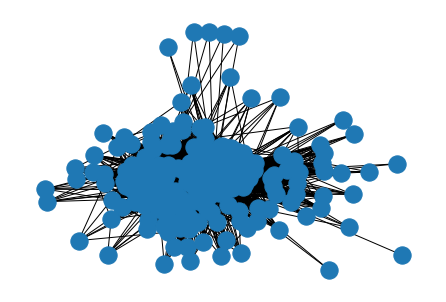

In [121]:
networkx.draw(G)

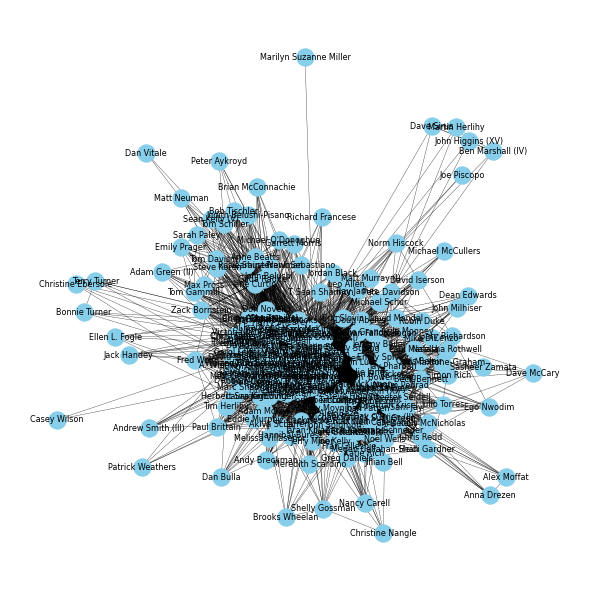

In [122]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

In [123]:
networkx.degree(G)

DegreeView({'Bill Murray': 133, 'Dan Aykroyd': 128, 'Gilda Radner': 49, 'Jane Curtin': 49, 'Mike Myers': 112, 'Molly Shannon': 135, 'Paul Shaffer': 119, 'Andrew Smith (III)': 8, 'Dennis Miller': 99, 'Gilbert Gottfried': 113, 'Herbert Sargent': 34, 'Jan Hooks': 57, 'Kevin Nealon': 106, 'Laurie Metcalf': 65, 'Rob Schneider': 110, 'Amy Poehler': 172, 'Billy Crystal': 107, 'Chevy Chase': 114, 'Chris Parnell': 113, 'Chris Rock': 130, 'Kristen Wiig': 145, 'Louis C.K.': 133, 'Tina Fey': 170, 'Tracy Morgan': 138, 'Alex Baze': 79, 'Doug Abeles': 37, 'John Mulaney': 93, 'Seth Meyers': 152, 'Bowen Yang': 48, 'Fred Armisen': 174, 'Heidi Gardner': 26, 'Meredith Scardino': 23, 'Robert Carlock': 80, "Conan O'Brien": 134, 'Jimmy Fallon': 150, 'Joe Kelly': 48, 'Julia Louis-Dreyfus': 129, 'Sarah Silverman': 147, 'Stephen Colbert': 151, 'Maya Rudolph': 164, 'Rachel Dratch': 132, 'Bob Odenkirk': 136, 'Chris Belair': 26, 'Martin Short': 151, 'Paul Masella': 26, 'Paula Pell': 137, 'Aidy Bryant': 84, 'Alex M

In [124]:
# Who has the most number of connections in the network?
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df


,node,degree
59,Lorne Michaels,215
29,Fred Armisen,174
15,Amy Poehler,172
22,Tina Fey,170
105,Bill Hader,167
...,...,...
215,Christine Ebersole,4
156,Joe Piscopo,2
214,Dan Vitale,2
208,Casey Wilson,2


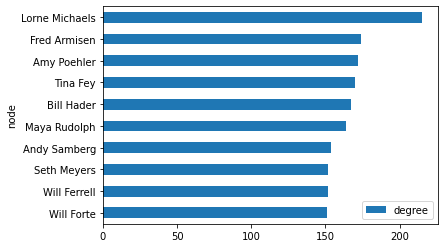

In [125]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

In [126]:
# Who has the most number of connections in the network (if you factor in edge weight)?
networkx.degree(G, weight='Weight')
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
59,Lorne Michaels,215
29,Fred Armisen,174
15,Amy Poehler,172
22,Tina Fey,170
105,Bill Hader,167
...,...,...
215,Christine Ebersole,4
156,Joe Piscopo,2
214,Dan Vitale,2
208,Casey Wilson,2


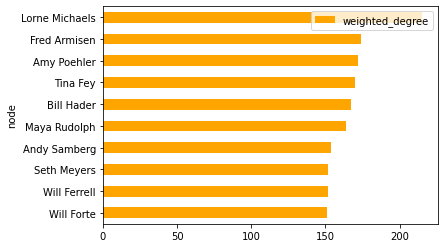

In [127]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

In [128]:
#Who connects the most other nodes in the network?
networkx.betweenness_centrality(G)
betweenness_centrality = networkx.betweenness_centrality(G)
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
59,Lorne Michaels,0.154998
29,Fred Armisen,0.029078
105,Bill Hader,0.020389
15,Amy Poehler,0.019894
22,Tina Fey,0.019413
...,...,...
66,Patrick Weathers,0.000000
203,Peter Aykroyd,0.000000
137,Warren Hutcherson,0.000000
207,Marilyn Suzanne Miller,0.000000


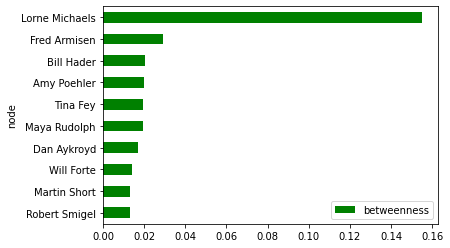

In [129]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

In [130]:
# Who forms distinct communities within this network?
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number
networkx.set_node_attributes(G, modularity_class, 'modularity_class')
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df.to_csv("communities_df.csv")

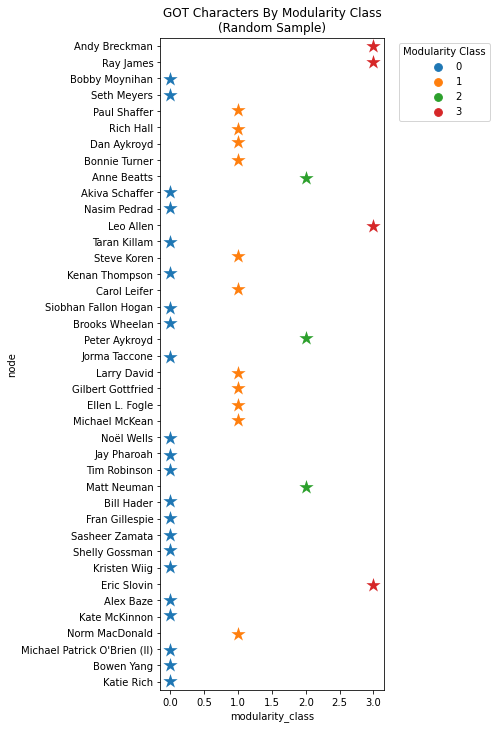

In [131]:
import seaborn as sns
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class\n(Random Sample)")
plt.show()

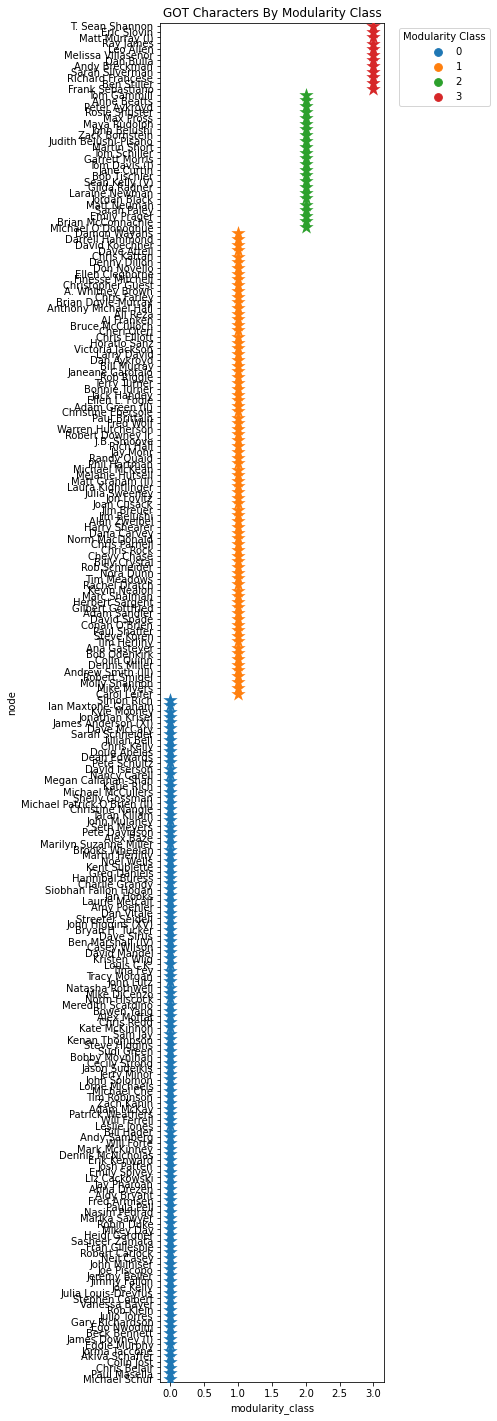

In [132]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class")
plt.show()

In [133]:
dict(G.nodes(data=True))
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,weighted_degree,betweenness,modularity_class
Lorne Michaels,215.0,215.0,0.154998,0.0
Fred Armisen,174.0,174.0,0.029078,0.0
Bill Hader,167.0,167.0,0.020389,0.0
Amy Poehler,172.0,172.0,0.019894,0.0
Tina Fey,170.0,170.0,0.019413,0.0
...,...,...,...,...
Patrick Weathers,5.0,5.0,0.000000,0.0
Peter Aykroyd,5.0,5.0,0.000000,2.0
Warren Hutcherson,91.0,91.0,0.000000,1.0
Marilyn Suzanne Miller,1.0,1.0,0.000000,0.0


In [134]:
# Build a Scatter Plot of Coefficients 
alums_coefficient = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/performers_with_coefficient.csv")
alums_coefficient.shape

(390, 20)

In [135]:
alums_coefficient.columns.values

array(['person', 'current', 'year_start', 'year_end', 'num_seasons_total',
       'num_seasons_writer', 'num_seasons_headwriter',
       'num_seasons_actor', 'num_seasons_rep', 'num_seasons_featured',
       'num_seasons_middle', 'num_seasons_weekend_update',
       'num_episodes_weekend_updates', 'best_of', 'num_episodes_hosted',
       'imdb_link', 'num_episodes_writer', 'num_episodes_actor',
       'num_episodes_other', 'coefficient'], dtype=object)

In [149]:
# Adam Sandler Scatter Plot
# get all of Adam Sandler's filmography - what percentage of his films are potential SNL media? 
# filter the big SNL scatter plot for Adam Sandler

# filter SNL dataset for Adam Sandler films
person_scatter = potential_snl.copy()
adam_sandler = person_scatter[person_scatter['snl_alums'].str.contains('Adam Sandler')]
adam_sandler = adam_sandler[adam_sandler['medium'].str.contains('Film')]

adam_chart = alt.Chart(adam_sandler).mark_circle(size=60).encode(
  # Year on the X axis
    x=alt.X('year_start:Q', axis=alt.Axis(format='c', title='Year (Start)'),scale=alt.Scale(domain=(1990, 2022))),
    
    # Number of objects on the Y axis
    y=alt.Y('movie_coefficient:Q', title='SNL Coefficient'),
    
    # Color according to the type
    color = alt.condition(alt.datum.movie_coefficient < 1, alt.value('red'), alt.value('blue')),
    
    # Details on hover
    tooltip=[alt.Tooltip('title:N', title='Title'), 
             alt.Tooltip('year_start:Q', title='Year (Start)'),
             alt.Tooltip('genres:N', title='Genre'),
             alt.Tooltip('medium:N', title='Medium'),
             alt.Tooltip('cast_count:Q', title='Cast Count'),
             alt.Tooltip('movie_coefficient:Q', title='Coefficient')]
).interactive()

adam_chart

adam_chart.save('visualizations/adam_sandler.html')

In [148]:
# filter SNL dataset for Adam Sandler films
bill_hader = person_scatter[person_scatter['snl_alums'].str.contains('Bill Hader')]
#bill_hader = adam_sandler[adam_sandler['medium'].str.contains('Film')]

bill_chart = alt.Chart(bill_hader).mark_circle(size=60).encode(
  # Year on the X axis
    x=alt.X('year_start:Q', axis=alt.Axis(format='c', title='Year (Start)'),scale=alt.Scale(domain=(1990, 2022))),
    
    # Number of objects on the Y axis
    y=alt.Y('movie_coefficient:Q', title='SNL Coefficient'),
    
    # Color according to the type
    #color = alt.condition(alt.datum.movie_coefficient < 1, alt.value('red'), alt.value('blue')),
    
    # Details on hover
    tooltip=[alt.Tooltip('title:N', title='Title'), 
             alt.Tooltip('year_start:Q', title='Year (Start)'),
             alt.Tooltip('genres:N', title='Genre'),
             alt.Tooltip('medium:N', title='Medium'),
             alt.Tooltip('cast_count:Q', title='Cast Count'),
             alt.Tooltip('movie_coefficient:Q', title='Coefficient')]
).interactive()

bill_chart

bill_chart.save('visualizations/bill_hader.html')

In [138]:
# filter SNL dataset for Adam Sandler films
tina_fey = person_scatter[person_scatter['snl_alums'].str.contains('Tina Fey')]
tina_links = tina_fey['imdb_link'].to_list()
#bill_hader = adam_sandler[adam_sandler['medium'].str.contains('Film')]

fey_chart = alt.Chart(tina_fey).mark_circle(size=60).encode(
  # Year on the X axis
    x=alt.X('year_start:Q', axis=alt.Axis(format='c', title='Year (Start)'),scale=alt.Scale(domain=(1990, 2022))),
    
    # Number of objects on the Y axis
    y=alt.Y('movie_coefficient:Q', title='SNL Coefficient'),
    
    # Color according to the type
    color = alt.condition(alt.datum.movie_coefficient < 1, alt.value('red'), alt.value('blue')),
    
    # Details on hover
    tooltip=[alt.Tooltip('title:N', title='Title'), 
             alt.Tooltip('year_start:Q', title='Year (Start)'),
             alt.Tooltip('genres:N', title='Genre'),
             alt.Tooltip('medium:N', title='Medium'),
             alt.Tooltip('cast_count:Q', title='Cast Count'),
             alt.Tooltip('movie_coefficient:Q', title='Coefficient')]
).interactive()

fey_chart

fey_chart.save('visualizations/tina_fey.html')

In [139]:
# filter SNL dataset for Adam Sandler films
amy_poehler = person_scatter[person_scatter['snl_alums'].str.contains('Amy Poehler')]
amy_links = amy_poehler['imdb_link'].to_list()
#bill_hader = adam_sandler[adam_sandler['medium'].str.contains('Film')]

amy_chart = alt.Chart(amy_poehler).mark_circle(size=60).encode(
  # Year on the X axis
    x=alt.X('year_start:Q', axis=alt.Axis(format='c', title='Year (Start)'),scale=alt.Scale(domain=(1990, 2022))),
    
    # Number of objects on the Y axis
    y=alt.Y('movie_coefficient:Q', title='SNL Coefficient'),
    
    # Color according to the type
    color = alt.condition(alt.datum.movie_coefficient < 1, alt.value('red'), alt.value('blue')),
    
    # Details on hover
    tooltip=[alt.Tooltip('title:N', title='Title'), 
             alt.Tooltip('year_start:Q', title='Year (Start)'),
             alt.Tooltip('genres:N', title='Genre'),
             alt.Tooltip('medium:N', title='Medium'),
             alt.Tooltip('cast_count:Q', title='Cast Count'),
             alt.Tooltip('movie_coefficient:Q', title='Coefficient')]
).interactive()

amy_chart

amy_chart.save('visualizations/amy_poehler.html')

In [140]:
amy_tina_collab = list(set(amy_links + tina_links))
collabs = person_scatter[person_scatter['imdb_link'].isin(amy_tina_collab)]

collab_chart = alt.Chart(collabs).mark_circle(size=60).encode(
  # Year on the X axis
    x=alt.X('year_start:Q', axis=alt.Axis(format='c', title='Year (Start)'),scale=alt.Scale(domain=(1990, 2022))),
    
    # Number of objects on the Y axis
    y=alt.Y('movie_coefficient:Q', title='SNL Coefficient'),
    
    # Color according to the type
    color = alt.condition(alt.datum.movie_coefficient < 1, alt.value('red'), alt.value('blue')),
    
    # Details on hover
    tooltip=[alt.Tooltip('title:N', title='Title'), 
             alt.Tooltip('year_start:Q', title='Year (Start)'),
             alt.Tooltip('genres:N', title='Genre'),
             alt.Tooltip('medium:N', title='Medium'),
             alt.Tooltip('cast_count:Q', title='Cast Count'),
             alt.Tooltip('movie_coefficient:Q', title='Coefficient')]
).interactive()

collab_chart

#collabs.save('visualizations/fey_poehler_collabs.html')

alt.Chart(...)

In [141]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [142]:
from bokeh.plotting import figure, output_file, save
p = figure(title = "SNL Alums Coefficients: Start Year x Coefficient",toolbar_location=None,
          tools="hover", tooltips="@person: @coefficient")
p.circle('year_start','coefficient',source=alums_coefficient,fill_alpha=0.2, size=10)
show(p)

output_file(filename="snl_alums_coefficient.html", title="SNL Alums Coefficient")

save(p)

'/Users/estene/Documents/GitHub/snl_coefficient/scripts/snl_alums_coefficient.html'

In [143]:
# what is the average coefficient? what is the median coefficient?
import statistics
from statistics import mean
all_coeffs = alums_coefficient['coefficient'].to_list()
all_coeffs.remove(1)
median = statistics.median(all_coeffs)
avg = mean(all_coeffs)
print(median, avg)

0.0260389900071377 0.05371831965124773


In [144]:
big_coeffs = []
for co in all_coeffs:
    if co > avg:
        big_coeffs.append(co)
print(len(big_coeffs))

177


In [147]:
imp_persons = alums_coefficient[alums_coefficient['coefficient'].isin(big_coeffs)].reset_index()
lst_imp_persons = imp_persons['person'].to_list()
#lst_imp_persons

p = figure(title = "SNL Alums Coefficients: Start Year x Coefficient",toolbar_location=None,
          tools="hover", tooltips="@person: @coefficient")
p.circle('year_start','coefficient',source=imp_persons,fill_alpha=0.2, size=10)
show(p)

output_file(filename="imp_snl_alums_coefficient.html", title="SNL Alums Coefficient")

save(p)

'/Users/estene/Documents/GitHub/snl_coefficient/scripts/imp_snl_alums_coefficient.html'

In [146]:
# load SNL feature films
# Bar Chart of Alums Involved in SNL Media (that aren't directly associated with SNL)
snl_feature_films = definitive_snl.copy()
feature_films = # load SNL feature films
snl_feature_films = snl_feature_films[snl_feature_films['imdb_link'].isin(feature_films)]
snl_feature_films.sort_values(by='year_start', ascending=False, inplace=True)

bars = alt.Chart(snl_feature_films).mark_bar().encode(x='movie_coefficient',y=alt.Y('title',sort='-x'))
text = bars.mark_text(
    align='left',
   baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

feature_films_chart = (bars + text).properties(height=900)
feature_films_chart.save('visualizations/snl_feature_films.html')

SyntaxError: invalid syntax (1634666198.py, line 4)